In [1]:
import pandas as pd
import requests 
import json
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
import seaborn as sns
import time
import gmaps
from google import key

In [2]:
master_data_1000 = "../Data/clean/master_pop_stadium_lft_merge.csv"

In [3]:
master_data_1000 = pd.read_csv(master_data_1000)

In [4]:
master_data_1000 = master_data_1000.drop(columns=["Unnamed: 0","Unnamed: 24"])

In [5]:
master_data_1000 = master_data_1000.rename(index = str, columns= {"City_x": "City", "State_x": "State"})

In [6]:
master_data_1000["Citystate"] = master_data_1000["City"] + "_"+ master_data_1000["State_abbrev"]

In [7]:
master_data_1000

,2018rank,City,State,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),2016 population density (ppl per sq mi),2016 population density (ppl per sq km),...,2019-01,2019-02,2019-03,2019-04,2019-05,2019_Avg,State_abbrev,Universities,Stadiums,Citystate
0,1,New York,New York,"8,398,748","8,175,133",2.74%,301.5,780.9,"28,317","10,933",...,2300.0,2300.0,2325.0,2400.0,2400.0,2345.0,NY,14.0,20.0,New York_NY
1,2,Los Angeles,California,"3,990,456","3,792,621",5.22%,468.7,"1,213.90","8,484","3,276",...,2353.0,2340.0,2351.0,2395.0,2362.0,2360.2,CA,0.0,20.0,Los Angeles_CA
2,3,Chicago,Illinois,"2,705,994","2,695,598",0.39%,227.3,588.7,"11,900","4,600",...,1659.0,1675.0,1691.0,1645.0,1650.0,1664.0,IL,9.0,20.0,Chicago_IL
3,4,Houston,Texas,"2,325,502","2,100,263",10.72%,637.5,"1,651.10","3,613","1,395",...,1250.0,1250.0,1264.0,1270.0,1269.0,1260.6,TX,9.0,20.0,Houston_TX
4,5,Phoenix,Arizona,"1,660,272","1,445,632",14.85%,517.6,"1,340.60","3,120","1,200",...,1033.0,1058.0,1055.0,1116.0,1171.0,1086.6,AZ,9.0,20.0,Phoenix_AZ
5,6,Philadelphia,Pennsylvania,"1,584,138","1,526,006",3.81%,134.2,347.6,"11,683","4,511",...,1550.0,1550.0,1557.5,1535.0,1500.0,1538.5,PA,10.0,20.0,Philadelphia_PA
6,7,San Antonio,Texas,"1,532,233","1,327,407",15.43%,461,"1,194.00","3,238","1,250",...,952.0,983.0,985.0,981.0,985.0,977.2,TX,10.0,20.0,San Antonio_TX
7,8,San Diego,California,"1,425,976","1,307,402",9.07%,325.2,842.3,"4,325","1,670",...,2016.0,2015.0,1995.0,1979.5,2000.0,2001.1,CA,10.0,20.0,San Diego_CA
8,9,Dallas,Texas,"1,345,047","1,197,816",12.29%,340.9,882.9,"3,866","1,493",...,1360.0,1398.0,1377.0,1375.0,1375.0,1377.0,TX,6.0,20.0,Dallas_TX
9,10,San Jose,California,"1,030,119","945,942",8.90%,177.5,459.7,"5,777","2,231",...,2505.0,2525.5,2591.0,2610.0,2593.0,2564.9,CA,11.0,20.0,San Jose_CA


In [8]:
fortune_data ="../Data/clean/fortune1000-final2.csv"

In [9]:
fortune_data = pd.read_csv(fortune_data)

In [10]:
fortune_data.replace(to_replace = "SF", value = "San Francisco", inplace = True)

In [11]:
new_col = [fortune_data["Revenues ($M)"][i].strip().rstrip().replace(',', '').replace('$', '')for i in fortune_data.index]
fortune_data["Revenue"] = new_col
fortune_data["Revenue"] = fortune_data["Revenue"].astype('float')

In [12]:
new_col2 = [fortune_data["Revenue Change"][i].strip().rstrip().replace('%', "").replace("-","0")for i in fortune_data.index]
fortune_data["Percent Revenue Change"] = new_col2


# if '-' means something (like 0), replace
# it it means missing data, remove rows
#new_col2
#[float(i)) for i in new_col2]
#fortune_data["Percent Revenue Change"] = fd2
fortune_data["Percent Revenue Change"] = fortune_data["Percent Revenue Change"].astype('float')

In [13]:
new_col3 = [fortune_data["Profits ($M)"][i].strip().rstrip().replace(',', '').replace('$', '').replace('(','').replace(')','').replace("-","0")for i in fortune_data.index]

fortune_data["Profits ($M)"] = new_col3

fortune_data["Profits ($M)"] = fortune_data["Profits ($M)"].astype('float')


In [14]:
new_col7 = [fortune_data["Profit Change"][i].strip().rstrip().replace("%", "").replace("-","0")for i in fortune_data.index]
fortune_data["Profit Change"] = new_col7

fortune_data["Profit Change"] = fortune_data["Profit Change"].astype('float')

In [15]:
new_col4 = [fortune_data["Assets ($M)"][i].strip().rstrip().replace(',','').replace('$','')for i in fortune_data.index]
fortune_data["Assets ($M)"] = new_col4
fortune_data["Assets ($M)"] = fortune_data["Assets ($M)"].astype('float')


In [16]:
new_col5 = [fortune_data["Mkt Value as of 3/29/18 ($M)"][i].strip().rstrip().replace(',','').replace('$','').replace('-','0')for i in fortune_data.index]
fortune_data["Market Value"] = new_col5
fortune_data["Market Value"] = fortune_data["Market Value"].astype('float')

In [17]:
new_col6 = [fortune_data["Employees"][i].strip().rstrip().replace(',', '')for i in fortune_data.index]
fortune_data["Employees"] = new_col6
fortune_data["Employees"] = fortune_data["Employees"].astype('float')

In [18]:
fortune_data["Citystate"] = fortune_data["City"] + "_" + fortune_data["State"]

In [19]:
fortune_data.groupby("title")

In [20]:
fortune_profit = fortune_data.groupby("Profits ($M)")

In [21]:
fortune_city = fortune_data[["Profits ($M)", "Profit Change", "Assets ($M)", "Market Value", "Employees", "Revenue", "Percent Revenue Change", "Citystate"]]

In [22]:
fortune_city.head()

,Profits ($M),Profit Change,Assets ($M),Market Value,Employees,Revenue,Percent Revenue Change,Citystate
0,9862.0,27.7,204522.0,263563.0,2300000.0,500343.0,3.0,Bentonville_AR
1,19710.0,151.4,348691.0,316157.0,71200.0,244363.0,17.4,Irving_TX
2,44940.0,86.7,702095.0,492008.0,377000.0,242137.0,8.3,Omaha_NE
3,48351.0,5.8,375319.0,851318.0,123000.0,229234.0,6.3,Cupertino_CA
4,10558.0,50.5,139058.0,207080.0,260000.0,201159.0,8.8,Minnetonka_MN


In [23]:
fortune_city = fortune_data.groupby(["Citystate"]).sum()

In [24]:
fortune_city

,rank,Profits ($M),Profit Change,Assets ($M),Employees,Latitude,Longitude,Revenue,Percent Revenue Change,Market Value
Citystate,,,,,,,,,,
Akron_OH,406,2070.0,72.6,59321.0,79617.0,82.162889,-163.038011,29004.0,5.1,22567.0
Allentown_PA,725,4128.4,416.1,59946.0,27662.0,81.204588,-150.942820,15889.0,12.3,54453.0
Ames_IA,918,79.1,278.4,10056.0,853.0,42.030781,-93.631913,2158.0,5.7,497.0
Andover_MA,984,339.1,223.6,2414.0,4923.0,42.658336,-71.136795,1916.0,47.9,6307.0
Ankeny_IA,425,177.5,21.5,3020.0,25463.0,41.731788,-93.600128,6641.0,5.3,4120.0
Ann Arbor_MI,776,277.9,29.5,837.0,14200.0,42.280826,-83.743038,2788.0,12.8,10060.0
Annapolis Junction_MD,627,151.1,17.9,6710.0,14300.0,39.120293,-76.776932,3737.0,2.5,3934.0
Arden Hills_MN,216,314.2,28.3,9509.0,10000.0,45.050244,-93.156611,13740.0,3.8,0.0
Arlington_TX,211,1038.4,17.2,12185.0,7735.0,32.735687,-97.108066,14091.0,15.9,16480.0


In [25]:

master_data_fortune = pd.merge(master_data_1000, fortune_city, on="Citystate", how="outer")
#for City_state in master_data_1000["Citystate"]:
    #print(City_state)
    #if City_state in master_data_1000["Citystate"]:
        #fortune_city.drop(["Citystate"][City_state])
        #print(City_state)
       # master_data_fortune = pd.merge(master_data_1000, fortune_city, on="Citystate", how="outer")
        #master_data_fortune.append(master_data_fortune)
        #master_data_fortune = master_data_fortune.drop(City_state)
    #else:
        #print("Not present")



In [26]:
master_data_fortune

,2018rank,City,State,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),2016 population density (ppl per sq mi),2016 population density (ppl per sq km),...,rank,Profits ($M),Profit Change,Assets ($M),Employees,Latitude,Longitude,Revenue,Percent Revenue Change,Market Value
0,1.0,New York,New York,"8,398,748","8,175,133",2.74%,301.5,780.9,"28,317","10,933",...,27024.0,170439.2,5736.8,10744300.0,2214170.0,2849.894271,-5180.418096,1251793.0,834.8,2493618.0
1,2.0,Los Angeles,California,"3,990,456","3,792,621",5.22%,468.7,"1,213.90","8,484","3,276",...,6223.0,2886.9,1516.7,105868.0,228815.0,374.941293,-1301.259337,76060.0,750.4,45732.0
2,3.0,Chicago,Illinois,"2,705,994","2,695,598",0.39%,227.3,588.7,"11,900","4,600",...,15278.0,27632.0,4425.9,691094.0,652191.0,1130.709067,-2366.004551,326019.0,433.8,527795.0
3,4.0,Houston,Texas,"2,325,502","2,100,263",10.72%,637.5,"1,651.10","3,613","1,395",...,19767.0,33362.7,3697.0,727143.0,452778.0,1160.953751,-3719.242805,446475.0,1251.6,626781.0
4,5.0,Phoenix,Arizona,"1,660,272","1,445,632",14.85%,517.6,"1,340.60","3,120","1,200",...,3145.0,5562.6,911.6,101628.0,168492.0,234.138640,-784.518261,65529.0,199.8,82939.0
5,6.0,Philadelphia,Pennsylvania,"1,584,138","1,526,006",3.81%,134.2,347.6,"11,683","4,511",...,1889.0,24055.0,432.6,219777.0,426672.0,199.762920,-375.826108,114886.0,18.2,189542.0
6,7.0,San Antonio,Texas,"1,532,233","1,327,407",15.43%,461,"1,194.00","3,238","1,250",...,673.0,8719.3,221.9,246379.0,75720.0,117.696488,-393.974513,158805.0,80.6,55402.0
7,8.0,San Diego,California,"1,425,976","1,307,402",9.07%,325.2,842.3,"4,325","1,670",...,3815.0,4013.6,225.4,127098.0,73009.0,196.294428,-702.966503,43303.0,50.2,165460.0
8,9.0,Dallas,Texas,"1,345,047","1,197,816",12.29%,340.9,882.9,"3,866","1,493",...,6952.0,42281.9,719.4,725205.0,675229.0,524.426627,-1548.751806,326113.0,192.5,428473.0
9,10.0,San Jose,California,"1,030,119","945,942",8.90%,177.5,459.7,"5,777","2,231",...,6946.0,16372.0,456.1,263894.0,265035.0,448.058498,-1462.635943,117247.0,166.4,528442.0


In [27]:
master_data_fortune = master_data_fortune[pd.notnull(master_data_fortune["County"])] 

In [28]:
master_data_fortune

,2018rank,City,State,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),2016 population density (ppl per sq mi),2016 population density (ppl per sq km),...,rank,Profits ($M),Profit Change,Assets ($M),Employees,Latitude,Longitude,Revenue,Percent Revenue Change,Market Value
0,1.0,New York,New York,"8,398,748","8,175,133",2.74%,301.5,780.9,"28,317","10,933",...,27024.0,170439.2,5736.8,10744300.0,2214170.0,2849.894271,-5180.418096,1251793.0,834.8,2493618.0
1,2.0,Los Angeles,California,"3,990,456","3,792,621",5.22%,468.7,"1,213.90","8,484","3,276",...,6223.0,2886.9,1516.7,105868.0,228815.0,374.941293,-1301.259337,76060.0,750.4,45732.0
2,3.0,Chicago,Illinois,"2,705,994","2,695,598",0.39%,227.3,588.7,"11,900","4,600",...,15278.0,27632.0,4425.9,691094.0,652191.0,1130.709067,-2366.004551,326019.0,433.8,527795.0
3,4.0,Houston,Texas,"2,325,502","2,100,263",10.72%,637.5,"1,651.10","3,613","1,395",...,19767.0,33362.7,3697.0,727143.0,452778.0,1160.953751,-3719.242805,446475.0,1251.6,626781.0
4,5.0,Phoenix,Arizona,"1,660,272","1,445,632",14.85%,517.6,"1,340.60","3,120","1,200",...,3145.0,5562.6,911.6,101628.0,168492.0,234.138640,-784.518261,65529.0,199.8,82939.0
5,6.0,Philadelphia,Pennsylvania,"1,584,138","1,526,006",3.81%,134.2,347.6,"11,683","4,511",...,1889.0,24055.0,432.6,219777.0,426672.0,199.762920,-375.826108,114886.0,18.2,189542.0
6,7.0,San Antonio,Texas,"1,532,233","1,327,407",15.43%,461,"1,194.00","3,238","1,250",...,673.0,8719.3,221.9,246379.0,75720.0,117.696488,-393.974513,158805.0,80.6,55402.0
7,8.0,San Diego,California,"1,425,976","1,307,402",9.07%,325.2,842.3,"4,325","1,670",...,3815.0,4013.6,225.4,127098.0,73009.0,196.294428,-702.966503,43303.0,50.2,165460.0
8,9.0,Dallas,Texas,"1,345,047","1,197,816",12.29%,340.9,882.9,"3,866","1,493",...,6952.0,42281.9,719.4,725205.0,675229.0,524.426627,-1548.751806,326113.0,192.5,428473.0
9,10.0,San Jose,California,"1,030,119","945,942",8.90%,177.5,459.7,"5,777","2,231",...,6946.0,16372.0,456.1,263894.0,265035.0,448.058498,-1462.635943,117247.0,166.4,528442.0


In [29]:
master_data_fortune = master_data_fortune[pd.notnull(master_data_fortune["County"])] 

In [30]:
#master_data_fortune_sum = master_data_fortune.groupby("Citystate").sum()

In [31]:
master_data_fortune_sum = master_data_fortune.drop(["Latitude", "Longitude"], axis= 1)

In [32]:
master_data_fortune_sum

,2018rank,City,State,2018estimate,2010Census,Change,2016 land area (sq mi),2016 land area (sq km),2016 population density (ppl per sq mi),2016 population density (ppl per sq km),...,Stadiums,Citystate,rank,Profits ($M),Profit Change,Assets ($M),Employees,Revenue,Percent Revenue Change,Market Value
0,1.0,New York,New York,"8,398,748","8,175,133",2.74%,301.5,780.9,"28,317","10,933",...,20.0,New York_NY,27024.0,170439.2,5736.8,10744300.0,2214170.0,1251793.0,834.8,2493618.0
1,2.0,Los Angeles,California,"3,990,456","3,792,621",5.22%,468.7,"1,213.90","8,484","3,276",...,20.0,Los Angeles_CA,6223.0,2886.9,1516.7,105868.0,228815.0,76060.0,750.4,45732.0
2,3.0,Chicago,Illinois,"2,705,994","2,695,598",0.39%,227.3,588.7,"11,900","4,600",...,20.0,Chicago_IL,15278.0,27632.0,4425.9,691094.0,652191.0,326019.0,433.8,527795.0
3,4.0,Houston,Texas,"2,325,502","2,100,263",10.72%,637.5,"1,651.10","3,613","1,395",...,20.0,Houston_TX,19767.0,33362.7,3697.0,727143.0,452778.0,446475.0,1251.6,626781.0
4,5.0,Phoenix,Arizona,"1,660,272","1,445,632",14.85%,517.6,"1,340.60","3,120","1,200",...,20.0,Phoenix_AZ,3145.0,5562.6,911.6,101628.0,168492.0,65529.0,199.8,82939.0
5,6.0,Philadelphia,Pennsylvania,"1,584,138","1,526,006",3.81%,134.2,347.6,"11,683","4,511",...,20.0,Philadelphia_PA,1889.0,24055.0,432.6,219777.0,426672.0,114886.0,18.2,189542.0
6,7.0,San Antonio,Texas,"1,532,233","1,327,407",15.43%,461,"1,194.00","3,238","1,250",...,20.0,San Antonio_TX,673.0,8719.3,221.9,246379.0,75720.0,158805.0,80.6,55402.0
7,8.0,San Diego,California,"1,425,976","1,307,402",9.07%,325.2,842.3,"4,325","1,670",...,20.0,San Diego_CA,3815.0,4013.6,225.4,127098.0,73009.0,43303.0,50.2,165460.0
8,9.0,Dallas,Texas,"1,345,047","1,197,816",12.29%,340.9,882.9,"3,866","1,493",...,20.0,Dallas_TX,6952.0,42281.9,719.4,725205.0,675229.0,326113.0,192.5,428473.0
9,10.0,San Jose,California,"1,030,119","945,942",8.90%,177.5,459.7,"5,777","2,231",...,20.0,San Jose_CA,6946.0,16372.0,456.1,263894.0,265035.0,117247.0,166.4,528442.0


In [33]:
#fortune_data["Market Value"] = fortune_data[fortune_data["Market Value"]!= '-']

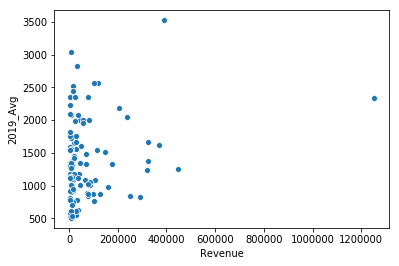

In [34]:
fortune_rev_scatter = sns.scatterplot( x = "Revenue", y = "2019_Avg", data =master_data_fortune_sum )

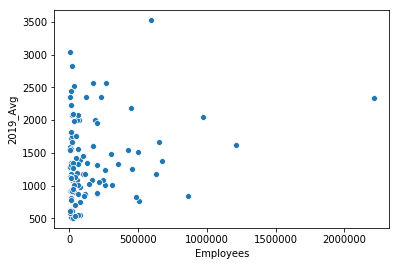

In [35]:
fortune_employee_scatter = sns.scatterplot( x = "Employees", y = "2019_Avg", data = master_data_fortune_sum )

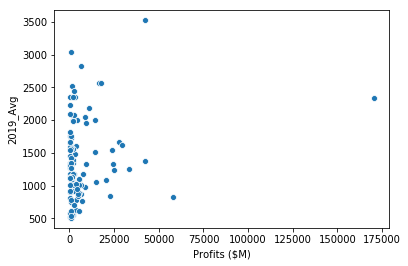

In [36]:
fortune_profit_scatter = sns.scatterplot( x = "Profits ($M)", y = "2019_Avg", data =master_data_fortune_sum )

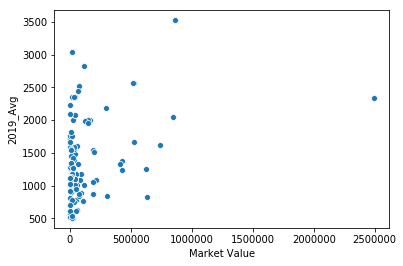

In [37]:
fortune_market_scatter = sns.scatterplot( x = "Market Value", y = "2019_Avg", data =master_data_fortune_sum )

In [38]:
master_data_fortune_sum.to_csv('../Data/clean/master_data_fortune_sum.csv', encoding ="utf-8", index=False)